In [6]:
!pip install seaborn
!pip install shutil

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Function to extract 'Yes' counts from a CSV file
def get_yes_counts(file_path):
    df = pd.read_csv(file_path)
    yes_counts = df[df['Categorization'].str.lower() == 'yes'].iloc[0, 1:].astype(int)
    return yes_counts


# Technique names
technique_names = [
    "Bootstrapping Level-1",
    "Bootstrapping with Diagnosis",
    "Bootstrapping with Definitions"
]

# Directory to save heatmap images
images_dir = "/kaggle/working/"
os.makedirs(images_dir, exist_ok=True)

# Set the visual theme for the heatmaps
sns.set_theme(style="white", font_scale=1.2)

# Loop through 17 patients
for patient_num in range(1, 17):
    # Corrected paths to the CSV files for each patient
    file_paths_corrected = [
        f'/kaggle/input/heatmap-stuff/Patient_Tables_Bootstrapping_level-1_vs_Manual_verification/csv/Patient_{patient_num}_Categorization_Table.csv',
        f'/kaggle/input/heatmap-stuff/Patient_Tables_Bootstrapping_level-2_vs_Manual_verification/csv/Patient_{patient_num}_Comparison.csv',
        f'/kaggle/input/heatmap-stuff/Patient_Tables_Bootstrapping_level-2-Enhanced -definitions_vs_Manual_verification/Patient_{patient_num}_Categorization_Comparison.csv'
    ]

    # Extract 'Yes' counts for each file and technique
    yes_counts_each_technique = {technique: get_yes_counts(file_path) for technique, file_path in zip(technique_names, file_paths_corrected)}

    # Convert to DataFrame
    df_yes_counts = pd.DataFrame(yes_counts_each_technique)

    # Calculate correlation matrix
    correlation_matrix_techniques = df_yes_counts.corr().abs()

    # Generate heatmap for each patient and save as an image
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(correlation_matrix_techniques, annot=True, cmap='vlag', linewidths=.5, vmin=0, vmax=1, cbar_kws={'shrink': .8})
    plt.title(f'Correlation Heatmap of Bootstrapping Techniques for Patient {patient_num}', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Save the figure
    fig = heatmap.get_figure()
    fig.savefig(f"{images_dir}/Patient_{patient_num}_Heatmap.png", bbox_inches='tight')
    plt.close(fig)

# Create a zip file containing all the heatmaps
zipf = zipfile.ZipFile('Heatmap_Images.zip', 'w', zipfile.ZIP_DEFLATED)
for root, dirs, files in os.walk(images_dir):
    for file in files:
        zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(images_dir, '..')))
zipf.close()

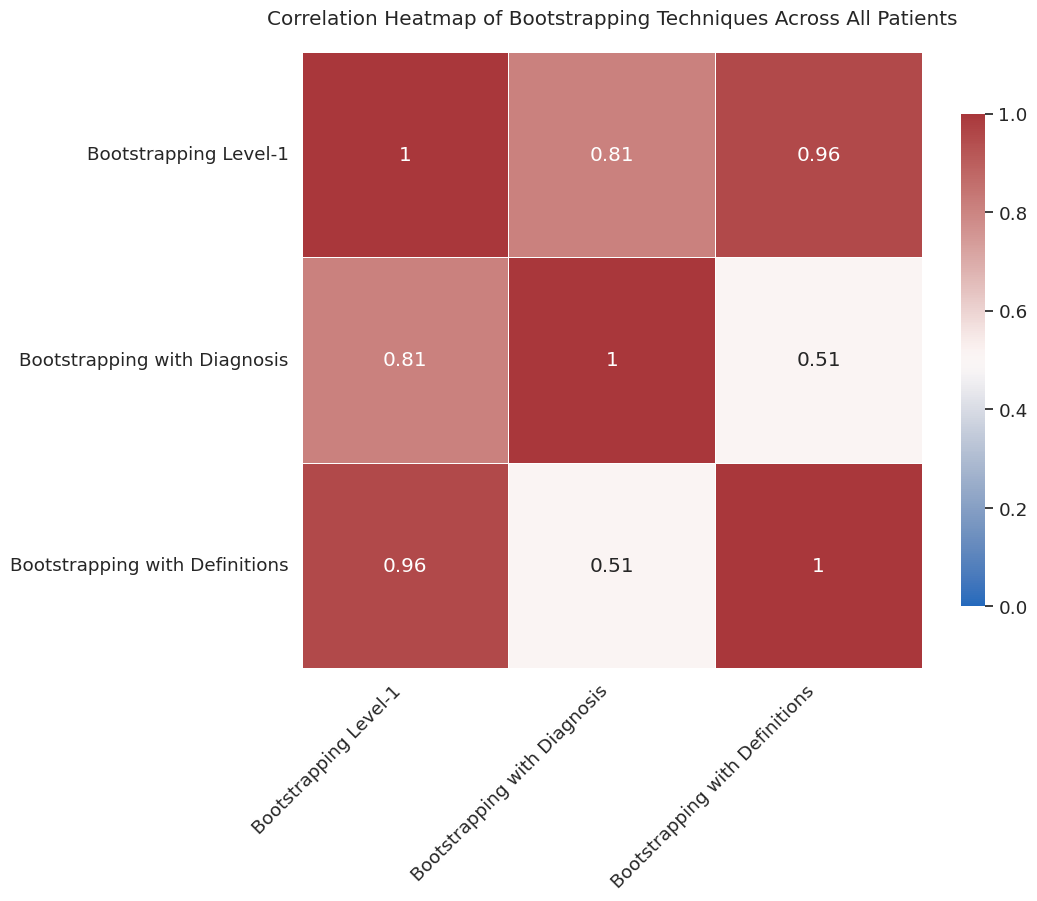

In [18]:


# Function to extract 'Yes' counts from a CSV file
def get_yes_counts(file_path):
    df = pd.read_csv(file_path)
    yes_counts = df[df['Categorization'].str.lower() == 'yes'].iloc[0, 1:].astype(int)
    return list(yes_counts)

# Base path for the patient CSV files
base_path = '/kaggle/input/heatmap-stuff/'

# Technique names
technique_names = [
    "Bootstrapping Level-1",
    "Bootstrapping with Diagnosis",
    "Bootstrapping with Definitions"
]

# Initialize a dictionary to store 'Yes' counts for each technique
yes_counts = {technique: [] for technique in technique_names}

# Loop through 17 patients
for patient_num in range(1, 17):
    # Paths to the CSV files for each patient
    file_paths_corrected = [
        f'/kaggle/input/heatmap-stuff/Patient_Tables_Bootstrapping_level-1_vs_Manual_verification/csv/Patient_{patient_num}_Categorization_Table.csv',
        f'/kaggle/input/heatmap-stuff/Patient_Tables_Bootstrapping_level-2_vs_Manual_verification/csv/Patient_{patient_num}_Comparison.csv',
        f'/kaggle/input/heatmap-stuff/Patient_Tables_Bootstrapping_level-2-Enhanced -definitions_vs_Manual_verification/Patient_{patient_num}_Categorization_Comparison.csv'
    ]

    # Extract 'Yes' counts for each file and technique, append to the list
    for i, file_path in enumerate(file_paths_corrected):
        yes_counts[technique_names[i]].extend(get_yes_counts(file_path))

# Convert the lists of 'Yes' counts to a DataFrame
df_yes_counts = pd.DataFrame(yes_counts)

# Calculate correlation matrix from the 'Yes' counts
correlation_matrix_techniques = df_yes_counts.corr().abs()

# Generate the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix_techniques, annot=True, cmap='vlag', linewidths=.5, vmin=0, vmax=1, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Bootstrapping Techniques Across All Patients', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Save or display the figure as needed
plt.show()


In [20]:
fig = heatmap.get_figure()
fig.savefig(f"{images_dir}/All_Patients_Heatmap.png", bbox_inches='tight')
plt.close(fig)